In [1]:
import librosa
import numpy as np

from sklearn.model_selection import train_test_split
from laughter_prediction.feature_extractors import LibrosaExtractor
from laughter_classification.sspnet_data_sampler import SSPNetDataSampler

In [2]:
FRAME_SEC = 0.5

sampler = SSPNetDataSampler('corpus/')
data = sampler.create_sampled_df(FRAME_SEC, save_path='samples.csv')

Sampled data already exists at samples.csv
Skipping generation.


In [3]:
data

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V140,V141,V142,V143,V144,V145,V146,V147,IS_LAUGHTER,SNAME
0,903.469993,22.110552,13.151943,46.213083,-17.533179,23.288871,-17.945700,4.478985,-16.021022,-8.827005,...,8.985123e+07,4.989764e+07,4.625960e+07,3.625273e+07,5.107908e+07,7.357580e+07,6.407850e+07,7.800024e+06,0,S1584
1,1076.620915,39.017817,-11.557705,18.714980,-26.330274,4.989787,-18.932455,-9.438138,-15.903813,3.718074,...,9.439361e+08,7.555011e+08,5.229335e+08,5.567003e+08,4.156222e+08,2.205994e+08,1.500357e+08,5.049134e+07,0,S1584
2,995.621771,-1.909144,2.695838,55.443860,-32.991052,-0.126695,-19.138405,3.964841,-24.811939,-17.698905,...,2.482918e+09,1.335233e+09,9.182979e+08,6.711759e+08,4.114660e+08,3.394379e+08,1.120452e+08,1.447846e+07,0,S1584
3,918.134076,59.672153,-6.183980,34.182409,-19.570943,3.922867,-26.072242,-5.724687,-9.738054,-6.946997,...,1.030339e+08,7.779213e+07,3.941465e+07,3.179126e+07,5.402894e+07,9.483624e+07,4.833910e+07,6.200207e+06,0,S1584
4,1030.135489,6.257672,1.848061,15.874738,-24.140455,-0.862834,-24.911275,-0.844526,-8.698000,-2.113416,...,2.005485e+09,1.743934e+09,1.992600e+09,7.783651e+08,6.701162e+08,6.316645e+08,7.908638e+08,1.029155e+08,0,S1584
5,961.377816,52.522774,-17.557274,1.941045,-20.307851,-4.248395,-25.000793,3.051878,-4.037327,6.550613,...,1.356309e+08,2.182004e+08,1.163452e+08,1.483880e+08,1.408915e+08,1.038244e+08,5.931210e+07,1.761189e+07,0,S1584
6,761.964469,20.230531,32.645223,18.937672,-11.092863,28.672319,-12.748840,6.777456,-1.451053,0.639220,...,3.558445e+08,2.730153e+08,1.203643e+08,1.448758e+08,3.511755e+08,9.177472e+07,5.720332e+07,2.715019e+06,0,S1584
7,1010.648714,43.221521,-13.236083,9.969821,-21.194722,-7.914655,-20.423984,-1.102676,-14.478999,-6.680046,...,1.815826e+08,2.625921e+08,8.179863e+08,5.382077e+08,2.978821e+08,5.443960e+08,1.032091e+09,4.099940e+07,0,S1584
8,888.524190,53.939711,1.464400,15.496075,-9.289676,14.041178,-30.184801,1.325074,-0.987138,-9.803185,...,9.373854e+08,8.853042e+08,1.327077e+09,7.806345e+08,6.205378e+08,6.880752e+08,5.397987e+08,1.454932e+08,0,S1584
9,937.605609,26.135193,0.053961,30.082861,-17.011509,12.291782,-20.312252,-1.407966,-14.758764,-8.319213,...,1.055404e+09,1.067678e+09,1.090863e+09,1.361128e+09,2.091015e+09,9.229794e+08,7.915229e+08,1.908742e+08,1,S1584


In [16]:
chunks = int(11 / FRAME_SEC)  # 11 seconds files at frame_sec rate
N_MFCC = 20  # defalut parameter in Librosa library
N_MELS = 128  # defalut parameters in Librosa library
features = N_MFCC + N_MELS

np.random.seed(0)

index = data['SNAME'].unique()
train_index, test_index = train_test_split(index)
print(train_index.shape)
print(test_index.shape)
train_data = np.array(data[data['SNAME'].isin(train_index)].drop(columns='SNAME'))
test_data = np.array(data[data['SNAME'].isin(test_index)].drop(columns='SNAME'))

X_train = train_data[:, :-1].reshape(len(train_index), chunks, features)
y_train = train_data[:, -1].reshape(len(train_index), chunks)
X_test = test_data[:, :-1].reshape(len(test_index), chunks, features)
y_test = test_data[:, -1].reshape(len(test_index), chunks)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2051,)
(684,)
<class 'numpy.ndarray'>
(2051, 22, 148)
(2051, 22)
(684, 22, 148)
(684, 22)


In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

In [6]:
class LaughterLSTM(nn.Module):

    def __init__(self, input_size, hidden_dim):
        super(LaughterLSTM, self).__init__()
        self.hidden_dim = hidden_dim

        self.lstm = nn.LSTM(input_size, hidden_dim)

        # The linear layer that maps from hidden state space to class space
        self.hidden2class = nn.Linear(hidden_dim, 2)
        self.hidden = None

    def init_hidden(self, batch_size):
        # The axes semantics are (num_layers, batch_size, hidden_dim)
        return (torch.zeros(1, batch_size, self.hidden_dim),
                torch.zeros(1, batch_size, self.hidden_dim))

    def forward(self, sound, batch_size):
        lstm_out, self.hidden = self.lstm(sound)
        class_space = self.hidden2class(lstm_out)
        class_probs = F.log_softmax(class_space, dim=-1)
        return class_probs

In [20]:
EPOCHS = 100

HIDDEN_DIM = 64

model = LaughterLSTM(features, HIDDEN_DIM)
loss_function = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

print('True are:', y_test[0])
with torch.no_grad():
    inputs = torch.tensor([X_test[0]], dtype=torch.float)
    model.init_hidden(1)
    class_scores = model(inputs, 1)
    print('Before:', F.softmax(class_scores, dim=-1))

train_losses = []
test_losses = []
for epoch in range(EPOCHS):
    print('Epoch:', epoch)

    # Train
    model.train()
    model.zero_grad()
    model.hidden = model.init_hidden(len(X_train))
    class_scores = model(torch.tensor(X_train, dtype=torch.float), len(X_train))
    targets = torch.tensor(y_train, dtype=torch.long)
    loss = loss_function(class_scores.reshape(-1, 2), targets.reshape(-1))
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())
    
    # Evaluate
    model.eval()
    model.hidden = model.init_hidden(len(X_test))
    class_scores = model(torch.tensor(X_test, dtype=torch.float), len(X_test))
    targets = torch.tensor(y_test, dtype=torch.long)
    loss = loss_function(class_scores.reshape(-1, 2), targets.reshape(-1))
    test_losses.append(loss.item())
    
with torch.no_grad():
    inputs = torch.tensor([X_test[0]], dtype=torch.float)
    model.init_hidden(1)
    class_scores = model(inputs, 1)
    print('After:', F.softmax(class_scores, dim=-1))

True are: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Before: tensor([[[0.5148, 0.4852],
         [0.5934, 0.4066],
         [0.4547, 0.5453],
         [0.3655, 0.6345],
         [0.3662, 0.6338],
         [0.4407, 0.5593],
         [0.4554, 0.5446],
         [0.3486, 0.6514],
         [0.2982, 0.7018],
         [0.5411, 0.4589],
         [0.4405, 0.5595],
         [0.4954, 0.5046],
         [0.5166, 0.4834],
         [0.5287, 0.4713],
         [0.5266, 0.4734],
         [0.3412, 0.6588],
         [0.3961, 0.6039],
         [0.4012, 0.5988],
         [0.3845, 0.6155],
         [0.5585, 0.4415],
         [0.4987, 0.5013],
         [0.4666, 0.5334]]])
Epoch: 0
Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
Epoch: 20
Epoch: 21
Epoch: 22
Epoch: 23
Epoch: 24
Epoch: 25
Epoch: 26
Epoch: 27
Epoch: 28
Epoch: 29
Epoch: 30
Epoch: 31
Epoch: 3

In [18]:
import matplotlib.pyplot as plt

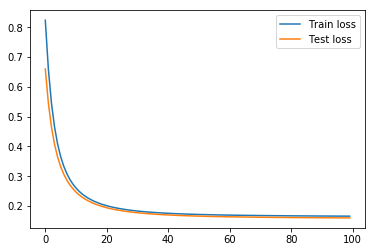

In [21]:
plt.plot(range(len(train_losses)), train_losses)
plt.plot(range(len(test_losses)), test_losses)
plt.legend(['Train loss', 'Test loss'])
plt.show()